In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
messages=pd.read_csv("SMS2.csv",encoding='latin-1')

In [4]:
messages.head()

,Labels,Message
0,AX-NSPSMS,You have successfully registered on NSP. Your ...
1,JM-UPGRAD,"Hi there, our 1:! Coaching session will help y..."
2,JK-JIOMRT,"Dear Customer, Big Summer Sale on JioMart Big ..."
3,JIO,"Dear User , You've got Specials coupon of Flat..."
4,AADHAAR,OTP for Aadhaar (XX0799) is 316880 (valid for ...


In [5]:
messages.info

<bound method DataFrame.info of                  Labels                                            Message
0             AX-NSPSMS  You have successfully registered on NSP. Your ...
1             JM-UPGRAD  Hi there, our 1:! Coaching session will help y...
2             JK-JIOMRT  Dear Customer, Big Summer Sale on JioMart Big ...
3                   JIO  Dear User , You've got Specials coupon of Flat...
4               AADHAAR  OTP for Aadhaar (XX0799) is 316880 (valid for ...
5                   JIO  Welcome to Jio-AP & Telangana. Kindly enable D...
6                 NOKIA  You are guaranteed the latest Nokia Phone, a 4...
7             CP-INTSHP  Dear Chetana , your application for Internship...
8                  AJIO  Hey Chetana! Your AJIO order FN6048301754 is o...
9               AADHAAR  OTP for Aadhaar (XX0799) is 316880 (valid for ...
10                  JIO  Dear User , You've got Specials coupon of Flat...
11  Union Bank Of India  A/c *5614 Credited for Rs:1000 on 11-04-202

In [6]:
messages.count()

Labels     13
Message    13
dtype: int64

In [8]:
unique_labels=messages['Labels'].unique()

In [9]:
unique_labels

array(['AX-NSPSMS', 'JM-UPGRAD', 'JK-JIOMRT', 'JIO', 'AADHAAR', 'NOKIA',
       'CP-INTSHP', 'AJIO', 'Union Bank Of India'], dtype=object)

##Exploratory Data analysis(EDA)

In [12]:
messages.info

<bound method DataFrame.info of                  Labels                                            Message
0             AX-NSPSMS  You have successfully registered on NSP. Your ...
1             JM-UPGRAD  Hi there, our 1:! Coaching session will help y...
2             JK-JIOMRT  Dear Customer, Big Summer Sale on JioMart Big ...
3                   JIO  Dear User , You've got Specials coupon of Flat...
4               AADHAAR  OTP for Aadhaar (XX0799) is 316880 (valid for ...
5                   JIO  Welcome to Jio-AP & Telangana. Kindly enable D...
6                 NOKIA  You are guaranteed the latest Nokia Phone, a 4...
7             CP-INTSHP  Dear Chetana , your application for Internship...
8                  AJIO  Hey Chetana! Your AJIO order FN6048301754 is o...
9               AADHAAR  OTP for Aadhaar (XX0799) is 316880 (valid for ...
10                  JIO  Dear User , You've got Specials coupon of Flat...
11  Union Bank Of India  A/c *5614 Credited for Rs:1000 on 11-04-202

In [13]:
messages.isnull().sum()

Labels     0
Message    0
dtype: int64

In [14]:
messages.shape

(13, 2)

In [17]:
messages['Labels'].value_counts()

JIO                    3
AADHAAR                3
AX-NSPSMS              1
JM-UPGRAD              1
JK-JIOMRT              1
NOKIA                  1
CP-INTSHP              1
AJIO                   1
Union Bank Of India    1
Name: Labels, dtype: int64

#Data **preprocessing**

###Calculating length of message

In [18]:
mes_len=0
length=[]
for i in range(len(messages)):
    length.append(len(messages['Message'][i]))
    

In [19]:
length

[87, 162, 156, 151, 150, 129, 148, 129, 100, 150, 151, 119, 150]

In [20]:
messages['Length']=length

In [21]:
messages.head()

,Labels,Message,Length
0,AX-NSPSMS,You have successfully registered on NSP. Your ...,87
1,JM-UPGRAD,"Hi there, our 1:! Coaching session will help y...",162
2,JK-JIOMRT,"Dear Customer, Big Summer Sale on JioMart Big ...",156
3,JIO,"Dear User , You've got Specials coupon of Flat...",151
4,AADHAAR,OTP for Aadhaar (XX0799) is 316880 (valid for ...,150


#Calculating punctuation in each message

In [23]:
#Calculating Punctuations in each message

import string
count=0
punct=[]
for i in range(len(messages)):
    for j in messages['Message'][i]:
        if j in string.punctuation:
            count+=1
    #print(count)
    punct.append(count)
    count=0
    

In [24]:
punct

[1, 8, 14, 12, 10, 6, 7, 7, 4, 10, 12, 9, 10]

In [25]:
messages['Punctuations_count']=punct

In [26]:
messages.head()

,Labels,Message,Length,Punctuations_count
0,AX-NSPSMS,You have successfully registered on NSP. Your ...,87,1
1,JM-UPGRAD,"Hi there, our 1:! Coaching session will help y...",162,8
2,JK-JIOMRT,"Dear Customer, Big Summer Sale on JioMart Big ...",156,14
3,JIO,"Dear User , You've got Specials coupon of Flat...",151,12
4,AADHAAR,OTP for Aadhaar (XX0799) is 316880 (valid for ...,150,10


##Text cleaning

In [27]:
#Regex
import re

#Stopwords
from nltk.corpus import stopwords

#Lemmatization
from nltk.stem import WordNetLemmatizer
#Creating object for Lemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
import nltk

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
#Removal of extra characters and stop words and lemmatization
corpus = []

#Skipping the 0th index (it's of Label)
for i in range(0,len(messages)):
    words = re.sub('[^a-zA-Z]',' ',messages['Message'][i])
    words = words.lower()
    #Splits into list of words 
    words = words.split()
    
    #Lemmatizing the word and removing the stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    
    #Again join words to form sentences
    words = ' '.join(words)
    
    corpus.append(words)

In [35]:
corpus[0]

'successfully registered nsp application id ka nicsi'

In [36]:
#Replacing Original Message with the Transformed Messages
messages['Message'] = corpus

In [37]:
messages.head()

,Labels,Message,Length,Punctuations_count
0,AX-NSPSMS,successfully registered nsp application id ka ...,87,1
1,JM-UPGRAD,hi coaching session help resolve concern regar...,162,8
2,JK-JIOMRT,dear customer big summer sale jiomart big disc...,156,14
3,JIO,dear user got special coupon flat sunglass spe...,151,12
4,AADHAAR,otp aadhaar xx valid min enhance security lock...,150,10


##Analysing the messages

In [38]:
messages['Labels']

0               AX-NSPSMS
1               JM-UPGRAD
2               JK-JIOMRT
3                     JIO
4                 AADHAAR
5                     JIO
6                   NOKIA
7               CP-INTSHP
8                    AJIO
9                 AADHAAR
10                    JIO
11    Union Bank Of India
12                AADHAAR
Name: Labels, dtype: object

In [40]:
JIO_messages=messages[messages['Labels']== 'JIO']
JK_JIOMRT_messages=messages[messages['Labels']== 'JK-JIOMRT']
AX_NSPSMS_messages=messages[messages['Labels']== 'AX-NSPSMS']
jM_UPGRAD_messages=messages[messages['Labels']== 'JM-UPGRAD']
AADHAAR_messages=messages[messages['Labels']== 'AADHAAR']
NOKIA_messages=messages[messages['Labels']== 'NOKIA']
CP_INTSHP_messages=messages[messages['Labels']== 'CP-INTSHP']
AJIO_messages=messages[messages['Labels']== 'AJIO']
Union_Bank_of_India_messages=messages[messages['Labels']== 'Union Bank Of India']

In [42]:
messages.head()

,Labels,Message,Length,Punctuations_count
0,AX-NSPSMS,successfully registered nsp application id ka ...,87,1
1,JM-UPGRAD,hi coaching session help resolve concern regar...,162,8
2,JK-JIOMRT,dear customer big summer sale jiomart big disc...,156,14
3,JIO,dear user got special coupon flat sunglass spe...,151,12
4,AADHAAR,otp aadhaar xx valid min enhance security lock...,150,10


In [43]:
JIO_messages['Length'].mean()

143.66666666666666

In [44]:
AADHAAR_messages['Length'].mean()

150.0

In [45]:
JIO_messages['Punctuations_count'].mean()

10.0

In [41]:
NOKIA_messages['Punctuations_count'].mean()

7.0

In [46]:
import matplotlib.pyplot as plt

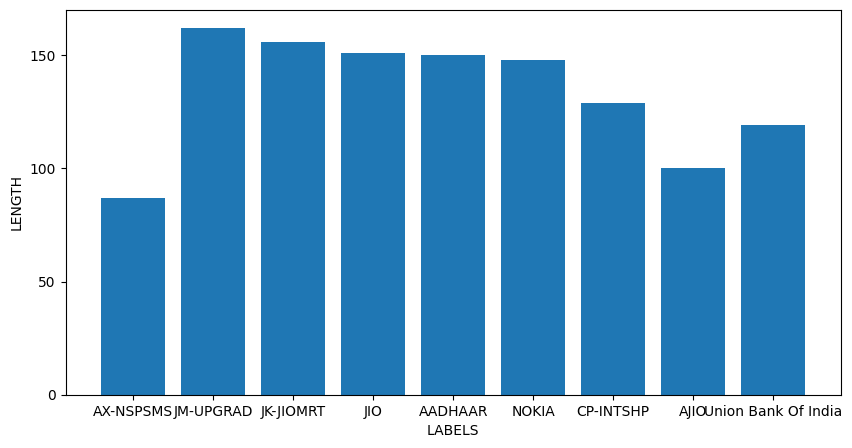

In [125]:
fig=plt.figure(figsize=(10, 5))
# Show the plot
plt.bar(messages['Labels'],messages['Length'])
plt.xlabel("LABELS")
plt.ylabel("LENGTH")
plt.yticks(range(0,200,50))
plt.show()

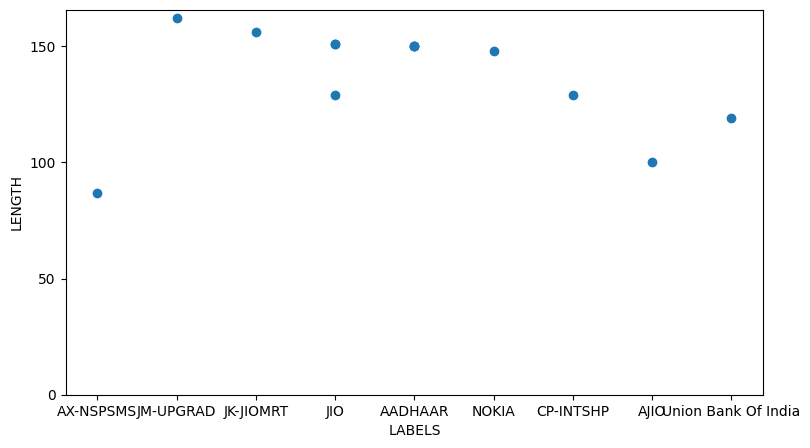

In [124]:
fig=plt.figure(figsize=(9, 5))
# Show the plot
plt.scatter(messages['Labels'],messages['Length'])
plt.xlabel("LABELS")
plt.ylabel("LENGTH")
plt.yticks(range(0,200,50))
plt.show()

##Model building

In [70]:
X = messages['Message']

In [71]:
X.head()

0    successfully registered nsp application id ka ...
1    hi coaching session help resolve concern regar...
2    dear customer big summer sale jiomart big disc...
3    dear user got special coupon flat sunglass spe...
4    otp aadhaar xx valid min enhance security lock...
Name: Message, dtype: object

In [72]:
y = messages['Labels']

In [73]:
y.head()

0    AX-NSPSMS
1    JM-UPGRAD
2    JK-JIOMRT
3          JIO
4      AADHAAR
Name: Labels, dtype: object

##Train test data splitting

In [74]:
from sklearn.model_selection import train_test_split

In [171]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2)

In [172]:
X_train.head()

12    otp aadhaar xx valid min enhance security lock...
11    c credited r mob bk ref avl bal r union bank i...
6     guaranteed latest nokia phone gb ipod mp playe...
9     otp aadhaar xx valid min enhance security lock...
0     successfully registered nsp application id ka ...
Name: Message, dtype: object

##Demonstration of count vectorizer

In [173]:
from sklearn.feature_extraction.text import CountVectorizer

In [174]:
count_vect=CountVectorizer()

In [175]:
X_train_count_vect=count_vect.fit_transform(X_train).toarray()

In [176]:
X_train_count_vect

array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0,

In [177]:
X_train_count_vect.shape

(10, 94)

##Demonstration of TF-IDF vectorizer

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [179]:
tfidf=TfidfVectorizer()

In [180]:
X_train_tfidf_vect=count_vect.fit_transform(X_train).toarray()

In [181]:
X_train_tfidf_vect

array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0,

In [182]:
X_train_tfidf_vect.shape

(10, 94)

##Pipelining

In [183]:
from sklearn.pipeline import Pipeline

##Naive bayer classifier

In [184]:
from sklearn.naive_bayes import MultinomialNB

In [185]:

text_mnb=Pipeline([('tfidf',TfidfVectorizer()),('mnb',MultinomialNB())])

In [186]:
text_mnb.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [187]:
X_test.head()

10    dear user got special coupon flat sunglass spe...
5     welcome jio ap telangana kindly enable data ro...
1     hi coaching session help resolve concern regar...
Name: Message, dtype: object

In [188]:
y_preds_mnb=text_mnb.predict(X_test)

In [189]:
y_preds_mnb

array(['JIO', 'AADHAAR', 'AADHAAR'], dtype='<U19')

In [190]:
text_mnb.score(X_train,y_train)

1.0

In [191]:
text_mnb.score(X_test,y_test)

0.3333333333333333

##Evaluation metrics

In [192]:
from sklearn.metrics import confusion_matrix

In [193]:
print(confusion_matrix(y_test,y_preds_mnb))

[[0 0 0]
 [1 1 0]
 [1 0 0]]


In [194]:
from sklearn.metrics import classification_report

In [195]:
print(classification_report(y_test,y_preds_mnb))

              precision    recall  f1-score   support

     AADHAAR       0.00      0.00      0.00         0
         JIO       1.00      0.50      0.67         2
   JM-UPGRAD       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.17      0.22         3
weighted avg       0.67      0.33      0.44         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

##SVM Classifier

In [196]:
from sklearn.svm import LinearSVC

In [197]:
text_svm=Pipeline([('tfidf',TfidfVectorizer()),('svm',LinearSVC())])

In [198]:
text_svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', LinearSVC())])

In [199]:
X_test.head()

10    dear user got special coupon flat sunglass spe...
5     welcome jio ap telangana kindly enable data ro...
1     hi coaching session help resolve concern regar...
Name: Message, dtype: object

In [200]:
y_preds_svm=text_svm.predict(X_test)

In [201]:
y_preds_svm

array(['JIO', 'AADHAAR', 'CP-INTSHP'], dtype=object)

In [202]:
text_svm.score(X_train,y_train)

1.0

In [203]:
text_svm.score(X_test,y_test)

0.3333333333333333

##Evaluation metrics

In [204]:

from sklearn.metrics import confusion_matrix

In [205]:
print(confusion_matrix(y_test,y_preds_svm))

[[0 0 0 0]
 [0 0 0 0]
 [1 0 1 0]
 [0 1 0 0]]


In [206]:
from sklearn.metrics import classification_report

In [207]:
print(classification_report(y_test,y_preds_svm))

              precision    recall  f1-score   support

     AADHAAR       0.00      0.00      0.00         0
   CP-INTSHP       0.00      0.00      0.00         0
         JIO       1.00      0.50      0.67         2
   JM-UPGRAD       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.12      0.17         3
weighted avg       0.67      0.33      0.44         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [208]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_preds_svm)
print("Accuracy:", accuracy)


Accuracy: 0.3333333333333333


##Prediction on new messages

In [209]:
text ='Welcome to Jio-Karnataka.Kindly enable data roaming to use data services.'

In [166]:
def refined_text(text):
    #Removal of extra characters and stop words
    words = re.sub('[^a-zA-Z]',' ',text)
    words = words.lower()
    #Splits into list of words 
    words = words.split()

    #Lemmatizing the word and removing the stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]

    #Again join words to form sentences
    words = ' '.join(words)
    return words

In [167]:
refined_word = refined_text(text)

In [168]:
refined_word = [refined_word]

In [169]:
refined_word

['welcome jio karnataka kindly enable data roaming use data service']

In [170]:
text_mnb.predict(refined_word)

array(['JIO'], dtype='<U9')